<a href="https://colab.research.google.com/github/Deep-Learning-Assignment/Deep-Learning-Project/blob/IT21156656/IT21156656_ex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset
Download the dataset from the kaggle to the google drive

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile
import os
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install split-folders

In [ ]:
zip_file_path = '/content/drive/MyDrive/Cinnex/Disease Ditection/Cinnamon Leaf Spot Diseases Classification Dataset.zip'  # Replace with the actual path
extraction_path = '/content/drive/MyDrive/Cinnex/Disease Ditection/Extracted_data'   # Replace with the desired extraction path

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Files extracted to: {extraction_path}")

Files extracted to: /content/drive/MyDrive/Cinnex/Disease Ditection/Extracted_data


### Split the Dataset
Split dataset into train (70%), validation (20%), and test (10%)


In [ ]:
import splitfolders

# Define the input and output folders
input_folder = '/content/drive/MyDrive/Cinnex/Disease Ditection/Extracted_data/Cinnamon Leasf Spot Diseases Classification Dataset' # Corrected path
output_folder = '/content/drive/MyDrive/Cinnex/Disease Ditection/split_data'  # Where to save the split datasets

# Split the dataset
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.7, .2, .1))

print("Dataset has been split into training, validation, and test sets.")


Copying files: 363 files [00:05, 72.07 files/s]

Dataset has been split into training, validation, and test sets.


### Setting up the Data Augmentation

In [ ]:
# Define the directories for train, validation, and test sets
train_dir = '/content/drive/MyDrive/Cinnex/Disease Ditection/split_data/train'
val_dir = '/content/drive/MyDrive/Cinnex/Disease Ditection/split_data/val'
test_dir = '/content/drive/MyDrive/Cinnex/Disease Ditection/split_data/test'

# Load the images and resize them to 224x224 (standard input size for VGG16)
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

val_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


test_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)





Found 253 files belonging to 2 classes.
Found 72 files belonging to 2 classes.
Found 38 files belonging to 2 classes.


### Buid The Model and Compile it

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

Compiling and Training Phase

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           3,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,788,726 (29.71 MB)

 Trainable params: 7,788,726 (29.71 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=val_set,epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5724 - loss: 1.0935 - val_accuracy: 0.5556 - val_loss: 0.6767
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.5186 - loss: 0.7378 - val_accuracy: 0.6250 - val_loss: 0.6358
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.6856 - loss: 0.5973 - val_accuracy: 0.6528 - val_loss: 0.6029
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6902 - loss: 0.5776 - val_accuracy: 0.7778 - val_loss: 0.4978
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7661 - loss: 0.5131 - val_accuracy: 0.7500 - val_loss: 0.5151
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.7668 - loss: 0.4978 - val_accuracy: 0.7500 - val_loss: 0.4912
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.7921 - loss: 0.4637 - val_accuracy: 0.7917 - val_loss: 0.4504
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.7666 - loss: 0.5192 - val_accuracy: 0.8194 - val_loss: 

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - accuracy: 0.8891 - loss: 0.2860
Training accuracy: 0.8932806253433228


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(val_set)
print('Validation accuracy:', val_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8455 - loss: 0.3702 
Validation accuracy: 0.8472222089767456


##Saving Model

In [ ]:
cnn.save('Cinnamon_disease_model.keras')

In [ ]:
# Define the desired path
model_save_path = '/content/drive/MyDrive/Cinnex/Disease Ditection/Cinnamon_disease_model.keras'

# Save the model to the specified path
cnn.save(model_save_path)

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.573122501373291,
  0.5573122501373291,
  0.6837944388389587,
  0.7035573124885559,
  0.7667984366416931,
  0.782608687877655,
  0.7984189987182617,
  0.7667984366416931,
  0.8339921236038208,
  0.8577075004577637],
 'loss': [0.9774648547172546,
  0.7155383825302124,
  0.6043248176574707,
  0.5655267238616943,
  0.5069112181663513,
  0.5001266002655029,
  0.45554909110069275,
  0.49012646079063416,
  0.39440277218818665,
  0.3562729060649872],
 'val_accuracy': [0.5555555820465088,
  0.625,
  0.6527777910232544,
  0.7777777910232544,
  0.75,
  0.75,
  0.7916666865348816,
  0.8194444179534912,
  0.7916666865348816,
  0.8472222089767456],
 'val_loss': [0.6767489910125732,
  0.6358218789100647,
  0.6029068827629089,
  0.49776512384414673,
  0.5150920152664185,
  0.4911758005619049,
  0.4504459798336029,
  0.4512730836868286,
  0.4322434961795807,
  0.35808420181274414]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


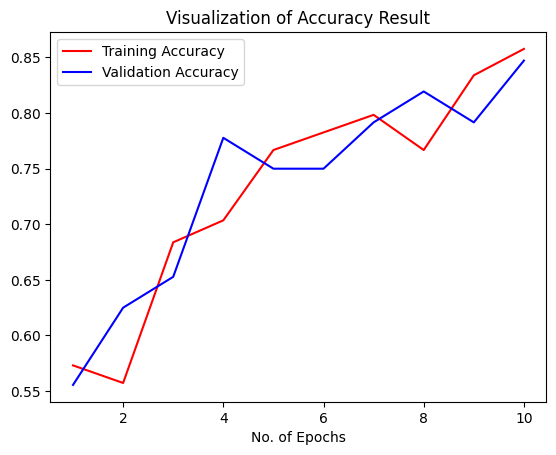

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
class_name = val_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 38 files belonging to 2 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(38,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [ ]:
predicted_categories

NameError: name 'predicted_categories' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

     Cinnamon_Healthy Leaf       0.81      0.91      0.86        23
Cinnamon_Leaf Spot Disease       0.83      0.67      0.74        15

                  accuracy                           0.82        38
                 macro avg       0.82      0.79      0.80        38
              weighted avg       0.82      0.82      0.81        38



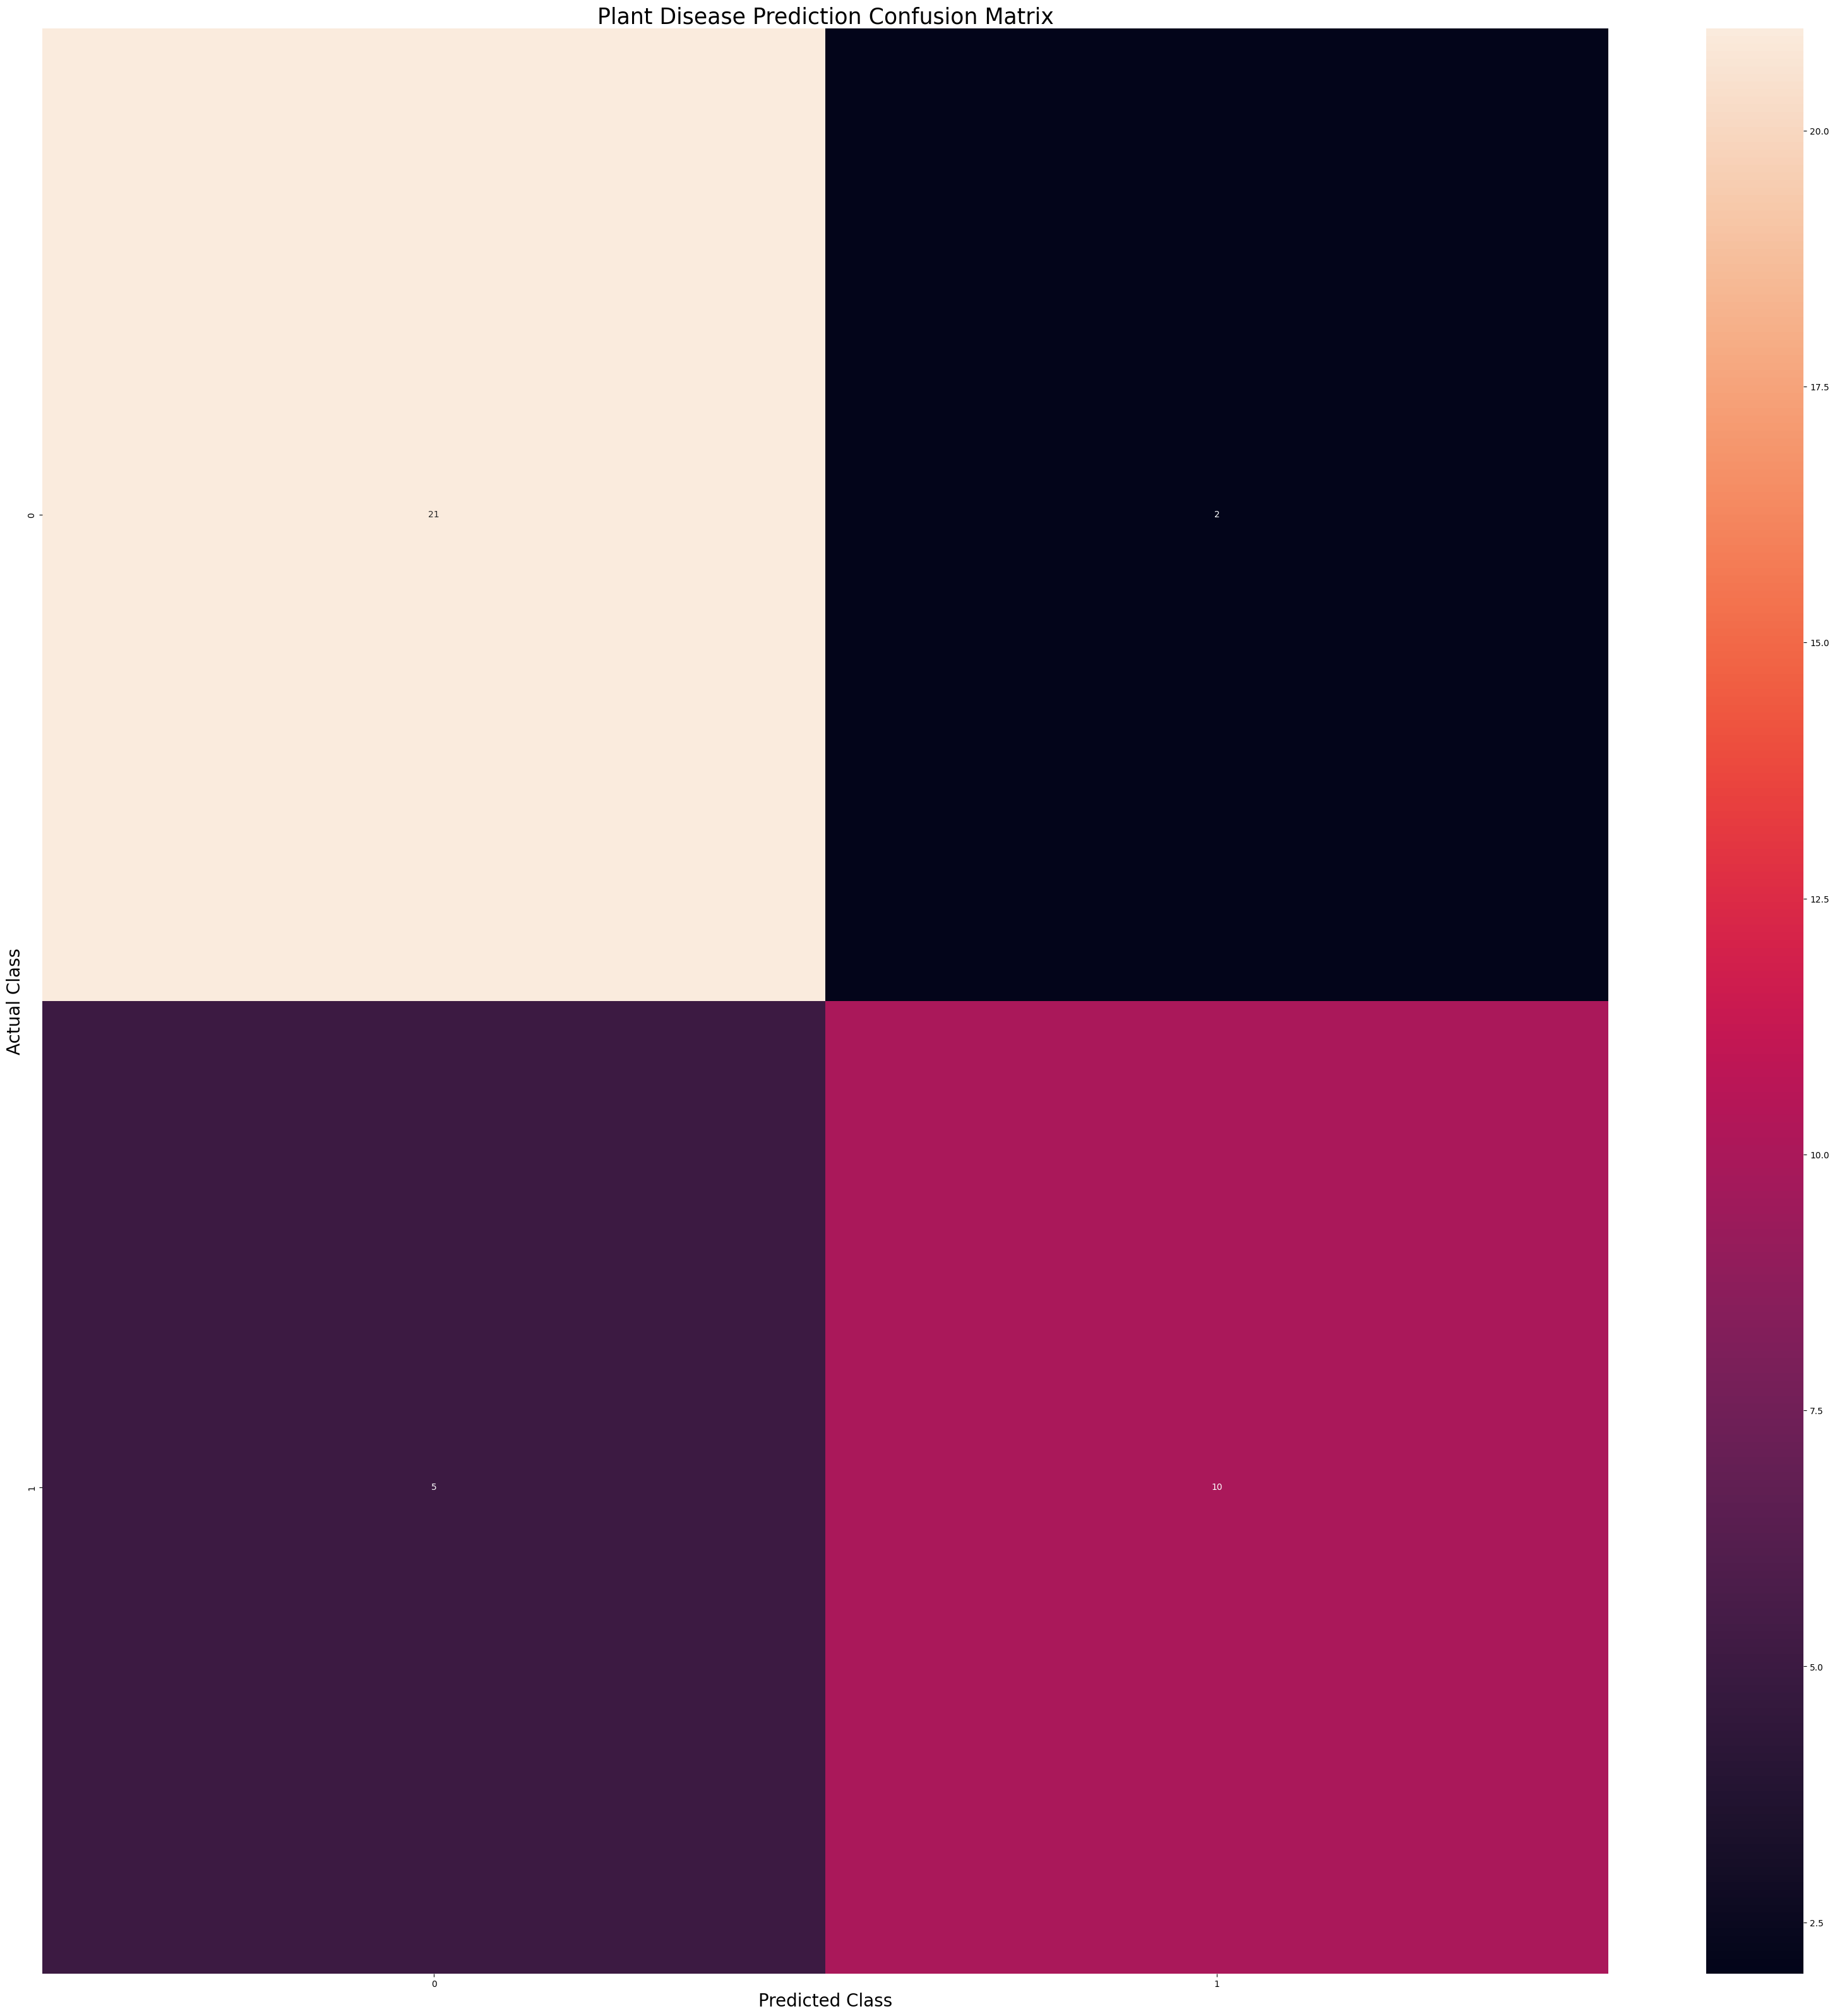

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

### Evaluate the Model

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Cinnex/Disease Ditection/Cinnamon_LeafSpot_disease_model.keras')

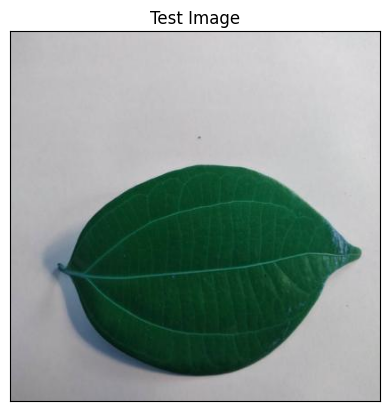

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Cinnex/Disease Ditection/Extracted_data/Cinnamon Leasf Spot Diseases Classification Dataset/Cinnamon_Healthy Leaf/20220815_153500_jpg.rf.91a5e0cf836b0c507526d3f804fed707.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np # Import the numpy library and assign it the alias 'np'
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [ ]:
print(predictions)

[[0.92566496 0.07433502]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


In [1]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'class_name' is not defined

In [ ]:
print(cnn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           3,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,366,180 (89.13 MB)

 Trainable params: 7,788,726 (29.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,577,454 (59.42 MB)

None


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(training_set.class_names)  # Or lb.fit(['healthy', 'diseased'])
binarized_labels = lb.transform(['Cinnamon_Healthy Leaf', 'Cinnamon_Leaf Spot Disease'])

print(binarized_labels)  # Output: [[1 0] [0 1] [1 0]]

[[0]
 [1]]


In [ ]:
import pickle

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(training_set.class_names)  # Or lb.fit(['healthy', 'diseased'])
binarized_labels = lb.transform(['Cinnamon_Healthy Leaf', 'Cinnamon_Leaf Spot Disease'])

print(binarized_labels)  # Output: [[1 0] [0 1] [1 0]]

# Save the LabelBinarizer to a file
with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(lb, f)

[[0]
 [1]]


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the trained model
cnn = tf.keras.models.load_model('Cinnamon_disease_model.keras')

# Load the LabelBinarizer
with open('label_binarizer.pkl', 'rb') as f:
    lb = pickle.load(f)

def calculate_disease_spread(image_path, model, label_binarizer):
    """Calculates the disease spread percentage within a single image.

    Args:
        image_path: Path to the image file.
        model: The trained Keras model.
        label_binarizer: The LabelBinarizer object.

    Returns:
        The disease spread percentage within the image.
    """

    # 1. Load and preprocess the image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.

    # 2. Make prediction
    predictions = model.predict(input_arr)
    result_index = np.argmax(predictions)
    predicted_label = label_binarizer.classes_[result_index]

    # 3. If diseased, proceed with segmentation (example using color thresholding)
    if predicted_label != 'Cinnamon_Healthy Leaf':  # Assuming 'Cinnamon_Healthy Leaf' is the healthy class
        img = cv2.imread(image_path)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Define color range for diseased areas (adjust as needed)
        lower_range = np.array([0, 50, 50])  # Example lower range for brown/yellowish diseased areas
        upper_range = np.array([30, 255, 255]) # Example upper range for brown/yellowish diseased areas

        # Create a mask for diseased areas
        mask = cv2.inRange(img_hsv, lower_range, upper_range)

        # Calculate disease spread percentage
        diseased_pixels = cv2.countNonZero(mask)
        total_pixels = img.shape[0] * img.shape[1]
        disease_spread_percentage = (diseased_pixels / total_pixels) * 100

        return disease_spread_percentage
    else:
        return 0  # Healthy leaf, 0% disease spread


# Example usage:
image_path = '/content/drive/MyDrive/Cinnex/Disease Ditection/split_data/train/Cinnamon_Leaf Spot Disease/IMG_20220815_161213_jpg.rf.b3b650f2636255cf40403bf47b27ce8f.jpg'
spread_percentage = calculate_disease_spread(image_path, cnn, lb)
print(f"Disease Spread Percentage in Image: {spread_percentage:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
Disease Spread Percentage in Image: 15.14%
